In [1]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import joblib as jl
import pandas as pd
import numpy as np
import cv2 as cv
import os

C:\Users\victo\AppData\Local\Temp\ipykernel_28136\2775056669.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
cols_names = {'label' : []}
for i in range(1, 31):
  for j in range(1, 31):
    cols_names['%dx%d' % (i, j)] = []

In [2]:
df = pd.DataFrame(cols_names)
df

NameError: name 'pd' is not defined

In [4]:
path = './numbers_for_dataset/'

In [5]:
for _, _, files in os.walk(path):
  for f in files:
    label = f[0]
    image = cv.imread(path + f)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    row = image.flatten()
    row = np.concatenate([[label], row])
    df.loc[len(df)] = row
    
print(len(df))

60


In [6]:
df.to_csv('dataset.csv', index=None)

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
X = df.drop('label', axis=1)
y = df['label']
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

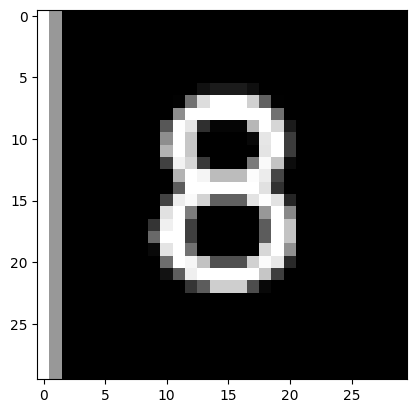

c:\Users\victo\VSCodeProjects\sudoku-solver\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'8'

In [8]:
# image = cv.imread(path + '5.png')
image = cv.imread('./cells/cell_0_3.png')
# plt.imshow(image)
# plt.show()
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image.reshape(1, -1).shape

row = image.flatten()

plt.imshow(image, cmap=plt.cm.binary)
plt.show()

model.predict([row])[0]

In [9]:
jl.dump(model, 'model.joblib') # save model

['model.joblib']

In [10]:
new_model = jl.load('model.joblib')

In [11]:
new_model.predict([row])[0]

c:\Users\victo\VSCodeProjects\sudoku-solver\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'8'